In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('price.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [4]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
df.drop('Date', axis = 1, inplace = True)

In [6]:
df.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
corr_df = df.corr()

<Axes: >

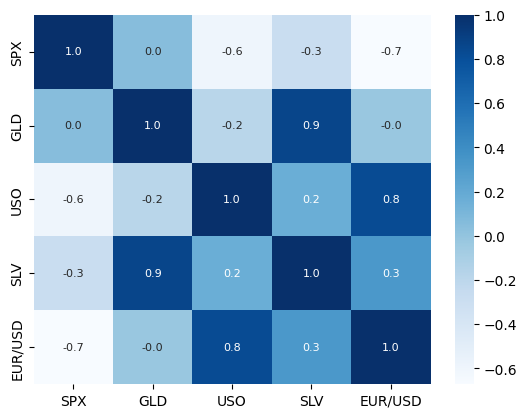

In [8]:
sns.heatmap(corr_df, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [9]:
corr_df['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<Axes: xlabel='GLD', ylabel='Count'>

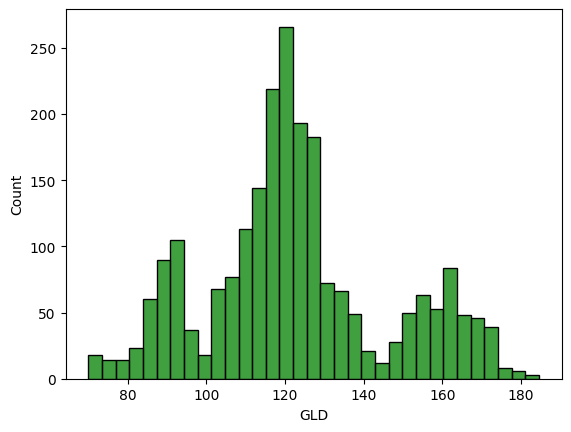

In [10]:
sns.histplot(df['GLD'],color='green')

In [11]:
X = df.drop('GLD', axis = 1)
y = df.GLD

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model = RandomForestRegressor().fit(X_train, y_train)

In [15]:
print('r squared error: ',metrics.r2_score(y_train, model.predict(X_train)))
print('mean absolute error: ',metrics.mean_absolute_error(y_train, model.predict(X_train)))

r squared error:  0.9984965666480026
mean absolute error:  0.48011654143558485


In [16]:
print('r squared error: ',metrics.r2_score(y_test, model.predict(X_test)))
print('mean absolute error: ',metrics.mean_absolute_error(y_test, model.predict(X_test)))

r squared error:  0.9913791986507869
mean absolute error:  1.2690257971834031


In [17]:
Y_test = list(y_test)

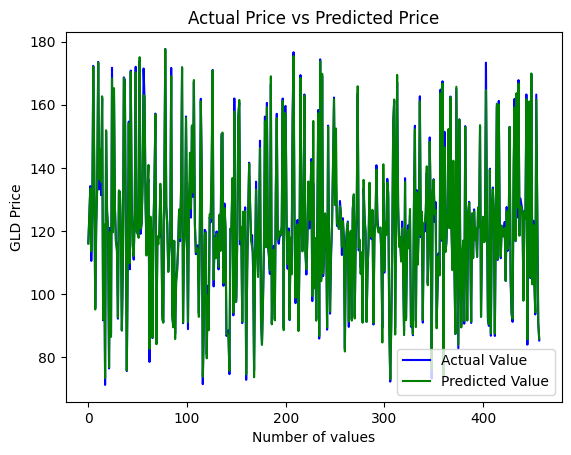

In [18]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(model.predict(X_test), color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [19]:
import tensorflow as tf
import keras
from keras import layers

In [20]:
# Create a model that include the normalization layer
model = tf.keras.Sequential([
    layers.Input(shape = 4),  
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(1)
  ])

model.compile(loss='mae',
                optimizer="adam")
model.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000
58/58 [==============================] - 1s 2ms/step - loss: 119.6245
Epoch 2/1000
58/58 [==============================] - 0s 2ms/step - loss: 67.5847
Epoch 3/1000
58/58 [==============================] - 0s 2ms/step - loss: 26.4984
Epoch 4/1000
58/58 [==============================] - 0s 2ms/step - loss: 20.2787
Epoch 5/1000
58/58 [==============================] - 0s 2ms/step - loss: 15.0246
Epoch 6/1000
58/58 [==============================] - 0s 2ms/step - loss: 10.2288
Epoch 7/1000
58/58 [==============================] - 0s 2ms/step - loss: 6.7990
Epoch 8/1000
58/58 [==============================] - 0s 2ms/step - loss: 5.2765
Epoch 9/1000
58/58 [==============================] - 0s 2ms/step - loss: 4.8261
Epoch 10/1000
58/58 [==============================] - 0s 2ms/step - loss: 4.5744
Epoch 11/1000
58/58 [==============================] - 0s 2ms/step - loss: 4.5410
Epoch 12/1000
58/58 [==============================] - 0s 2ms/step - loss: 4.2421
Epoch 13/1000
58/5

58/58 [==============================] - 0s 2ms/step - loss: 2.8293
Epoch 101/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.8494
Epoch 102/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.8751
Epoch 103/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.8058
Epoch 104/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.7905
Epoch 105/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.8263
Epoch 106/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.8323
Epoch 107/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.8558
Epoch 108/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.8297
Epoch 109/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.7939
Epoch 110/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.7342
Epoch 111/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.7662
Epoch 112/1000
58/5

58/58 [==============================] - 0s 2ms/step - loss: 2.5771
Epoch 199/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.6437
Epoch 200/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.5800
Epoch 201/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.5200
Epoch 202/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.5167
Epoch 203/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.5869
Epoch 204/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.5453
Epoch 205/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.4527
Epoch 206/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.5521
Epoch 207/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.5241
Epoch 208/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.5409
Epoch 209/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.7106
Epoch 210/1000
58/5

58/58 [==============================] - 0s 2ms/step - loss: 2.3525
Epoch 297/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.3742
Epoch 298/1000
58/58 [==============================] - 0s 3ms/step - loss: 2.3378
Epoch 299/1000
58/58 [==============================] - 0s 3ms/step - loss: 2.3470
Epoch 300/1000
58/58 [==============================] - 0s 3ms/step - loss: 2.4209
Epoch 301/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.3308
Epoch 302/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.3874
Epoch 303/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.2976
Epoch 304/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.3240
Epoch 305/1000
58/58 [==============================] - 0s 3ms/step - loss: 2.3789
Epoch 306/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.5158
Epoch 307/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.3237
Epoch 308/1000
58/5

58/58 [==============================] - 0s 2ms/step - loss: 2.2743
Epoch 395/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.2488
Epoch 396/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.2681
Epoch 397/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.2529
Epoch 398/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.4086
Epoch 399/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.2832
Epoch 400/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.3668
Epoch 401/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.3112
Epoch 402/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.2057
Epoch 403/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.1918
Epoch 404/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.2119
Epoch 405/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.1801
Epoch 406/1000
58/5

58/58 [==============================] - 0s 2ms/step - loss: 2.2195
Epoch 493/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.2400
Epoch 494/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.1190
Epoch 495/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.1742
Epoch 496/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0883
Epoch 497/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.1250
Epoch 498/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.1767
Epoch 499/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.1483
Epoch 500/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.1787
Epoch 501/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0500
Epoch 502/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.1516
Epoch 503/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.1101
Epoch 504/1000
58/5

58/58 [==============================] - 0s 2ms/step - loss: 2.1264
Epoch 591/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.1036
Epoch 592/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.1096
Epoch 593/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0934
Epoch 594/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.1511
Epoch 595/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0227
Epoch 596/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0553
Epoch 597/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0090
Epoch 598/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0667
Epoch 599/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.1079
Epoch 600/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.1409
Epoch 601/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0562
Epoch 602/1000
58/5

58/58 [==============================] - 0s 2ms/step - loss: 2.0526
Epoch 689/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.2013
Epoch 690/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0516
Epoch 691/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0030
Epoch 692/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.1689
Epoch 693/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0670
Epoch 694/1000
58/58 [==============================] - 0s 3ms/step - loss: 2.0235
Epoch 695/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.1178
Epoch 696/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0355
Epoch 697/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0099
Epoch 698/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0498
Epoch 699/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.1267
Epoch 700/1000
58/5

58/58 [==============================] - 0s 2ms/step - loss: 1.9805
Epoch 787/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0004
Epoch 788/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0507
Epoch 789/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0129
Epoch 790/1000
58/58 [==============================] - 0s 2ms/step - loss: 1.9755
Epoch 791/1000
58/58 [==============================] - 0s 2ms/step - loss: 1.9610
Epoch 792/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0255
Epoch 793/1000
58/58 [==============================] - 0s 2ms/step - loss: 1.9960
Epoch 794/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0739
Epoch 795/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0190
Epoch 796/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0127
Epoch 797/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0106
Epoch 798/1000
58/5

58/58 [==============================] - 0s 2ms/step - loss: 2.0576
Epoch 885/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0013
Epoch 886/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0662
Epoch 887/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0841
Epoch 888/1000
58/58 [==============================] - 0s 2ms/step - loss: 1.9707
Epoch 889/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0569
Epoch 890/1000
58/58 [==============================] - 0s 2ms/step - loss: 1.9871
Epoch 891/1000
58/58 [==============================] - 0s 2ms/step - loss: 1.9560
Epoch 892/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.1897
Epoch 893/1000
58/58 [==============================] - 0s 2ms/step - loss: 1.9896
Epoch 894/1000
58/58 [==============================] - 0s 2ms/step - loss: 1.9363
Epoch 895/1000
58/58 [==============================] - 0s 2ms/step - loss: 1.9807
Epoch 896/1000
58/5

58/58 [==============================] - 0s 2ms/step - loss: 2.0188
Epoch 983/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0301
Epoch 984/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0931
Epoch 985/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0818
Epoch 986/1000
58/58 [==============================] - 0s 2ms/step - loss: 1.9170
Epoch 987/1000
58/58 [==============================] - 0s 2ms/step - loss: 1.9665
Epoch 988/1000
58/58 [==============================] - 0s 2ms/step - loss: 2.0855
Epoch 989/1000
58/58 [==============================] - 0s 2ms/step - loss: 1.9746
Epoch 990/1000
58/58 [==============================] - 0s 2ms/step - loss: 1.9065
Epoch 991/1000
58/58 [==============================] - 0s 2ms/step - loss: 1.9668
Epoch 992/1000
58/58 [==============================] - 0s 2ms/step - loss: 1.9819
Epoch 993/1000
58/58 [==============================] - 0s 2ms/step - loss: 1.9956
Epoch 994/1000
58/5

In [21]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 1ms/step - loss: 2.1993


2.1992881298065186

15/15 [==============================] - 0s 988us/step


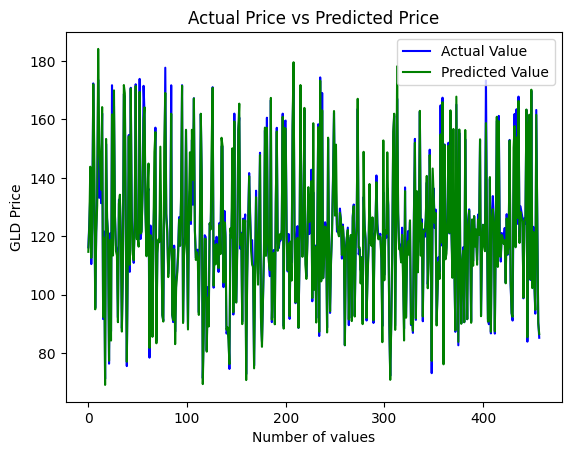

In [22]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(model.predict(X_test), color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()